In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('court.mplstyle')

### runs in notebook_env

# Convenience Functions

In [3]:
def load_profile(profile_number, logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [4]:
def load_history_file(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'),
                         skiprows=5, sep='\s+')

In [5]:
def get_index(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

In [6]:
def plot_composition(profile,elements_dict):
    prof = profile
    for element in elements_dict.keys():
        plt.plot(prof.mass,elements_dict[element],label=element)
    plt.yscale('log')
    plt.ylim(bottom=10**-14)
    plt.legend(bbox_to_anchor=(1,0),loc='lower left')#,bbox_inches='tight')
    plt.title('Composition')
    plt.xlabel(r'Mass Coordinate')
    plt.ylabel(r'log(mass fraction)')
    plt.show()

# He-WD Progenitor

In [7]:
logs_dir = os.path.join('../mesaruns/engineering/progenitors/rcbnet_hewd/', 'LOGS')
logs_dir

'../mesaruns/engineering/progenitors/rcbnet_hewd/LOGS'

In [8]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,1955,8.803380e+05,5.944649,0.15,32.474597,-99.0,0.0,1.0,0.999999,...,4.934589e-20,0.990277,0.000048,0.000244,0.000047,0.000298,0.000339,0.148202,0,3
1,10,1736,1.810642e+07,6.392173,0.15,32.474597,-99.0,0.0,1.0,0.999999,...,2.231071e-20,0.990277,0.000048,0.000244,0.000047,0.000298,0.000338,0.148203,0,3
2,20,1718,4.470385e+07,6.421290,0.15,32.474597,-99.0,0.0,1.0,0.999997,...,6.944355e-21,0.990277,0.000048,0.000244,0.000047,0.000298,0.000336,0.148205,0,3
3,30,1701,7.468264e+07,6.515711,0.15,32.474597,-99.0,0.0,1.0,0.999993,...,2.064211e-21,0.990277,0.000048,0.000244,0.000047,0.000298,0.000335,0.148206,0,3
4,40,1689,1.104520e+08,6.551381,0.15,32.474597,-99.0,0.0,1.0,0.999982,...,5.515935e-22,0.990277,0.000048,0.000244,0.000047,0.000298,0.000333,0.148208,0,3
5,50,1676,1.509914e+08,6.648173,0.15,32.474597,-99.0,0.0,1.0,0.999964,...,1.393999e-22,0.990277,0.000048,0.000244,0.000047,0.000298,0.000332,0.148209,0,3
6,60,1662,2.000108e+08,6.693180,0.15,32.474597,-99.0,0.0,1.0,0.999937,...,2.968648e-23,0.990277,0.000048,0.000244,0.000047,0.000298,0.000331,0.148210,0,3
7,70,1659,2.572989e+08,6.806054,0.15,32.474597,-99.0,0.0,1.0,0.999907,...,5.638446e-24,0.990277,0.000048,0.000244,0.000047,0.000298,0.000330,0.148211,0,3
8,80,1655,3.299087e+08,6.875773,0.15,32.474597,-99.0,0.0,1.0,0.999845,...,9.393134e-25,0.990277,0.000048,0.000244,0.000047,0.000298,0.000329,0.148212,0,3
9,90,1659,4.201922e+08,7.015464,0.15,32.474597,-99.0,0.0,1.0,0.999745,...,2.129304e-25,0.990277,0.000048,0.000244,0.000047,0.000298,0.000328,0.148213,0,3


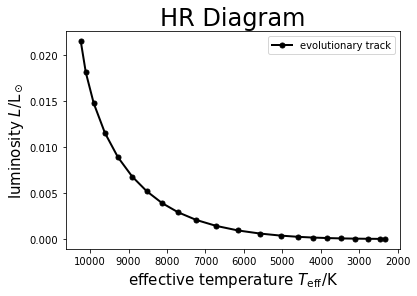

In [9]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [10]:
#change a thing

In [11]:
# np.sort(os.listdir(logs_dir))

In [12]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,100,1,1
1,200,1,2
2,215,3,3


In [13]:
prof = load_profile(3,logs_dir)
# prof = load_profile(4,logs_dir)

In [14]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]
element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]


# elements_dict = {'h1':prof.h1.values, 'he3':prof.he3.values, 'he4':prof.he4.values, 
#                  'c12':prof.c12.values, 'n14':prof.n14.values, 'o16':prof.o16.values, 
#                  'o18':prof.o18.values, 'ne20':prof.ne20.values, 'ne22':prof.ne22.values, 
#                  'mg24':prof.mg24.values}

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']
element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

# print(len(element_list))

elements_dict = dict(zip(element_list, element_value_list))
# elements_dict

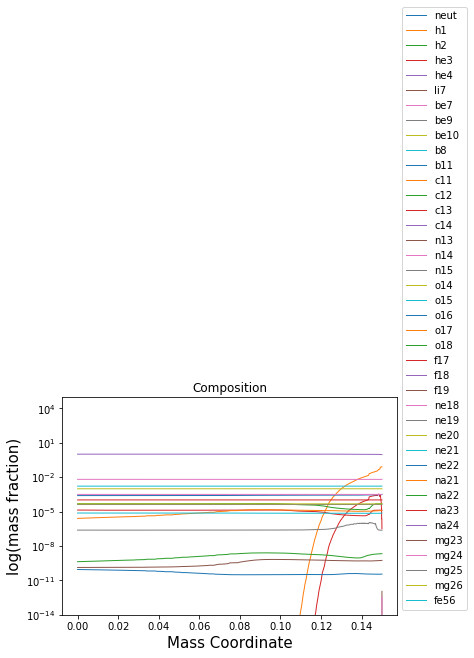

In [15]:
plot_composition(prof,elements_dict)

In [16]:
def mass_averaged_abunds(profile,elements_dict):
    prof = profile
    massfracs_dict = dict.fromkeys(elements_dict.keys())
    total_mass = np.max(prof.mass)
    zone_mass = prof.dm.values / 1.989e33
    print(total_mass)
#     print(zone_mass)
    total_massfrac_sanity = 0
    for element in elements_dict.keys():
        massfraction_perzone = elements_dict[element]
        total_element_mass = 0
        for i in range(0,len(zone_mass)):
            total_element_mass = total_element_mass + (zone_mass[i]*massfraction_perzone[i])
        total_massfrac = total_element_mass/total_mass
        massfracs_dict[element] = total_massfrac
        total_massfrac_sanity = total_massfrac_sanity + total_massfrac
    print('sanity check, should be almost 1:',total_massfrac_sanity) # this should be very close to ONE
        
    return massfracs_dict

In [17]:
def mass_averaged_abunds_nodm(profile,elements_dict):
    prof = profile
    massfracs_dict = dict.fromkeys(elements_dict.keys())
    total_mass = np.max(prof.mass)
    zone_mass = -np.diff(prof.mass.values)#/ 1.989e33
#     print(zone_mass)
#     zone_mass = prof.dm.values / 1.989e33
    print(total_mass)
#     print(zone_mass)
    total_massfrac_sanity = 0
    for element in elements_dict.keys():
        massfraction_perzone = elements_dict[element]
        total_element_mass = 0
        for i in range(0,len(zone_mass)):
            total_element_mass = total_element_mass + (zone_mass[i]*massfraction_perzone[i])
        total_massfrac = total_element_mass/total_mass
        massfracs_dict[element] = total_massfrac
        total_massfrac_sanity = total_massfrac_sanity + total_massfrac
    print('sanity check, should be almost 1:',total_massfrac_sanity) # this should be very close to ONE
        
    return massfracs_dict

In [18]:
# massfracs_dict = mass_averaged_abunds_nodm(prof,elements_dict)
massfracs_dict = mass_averaged_abunds(prof,elements_dict)
massfracs_dict

0.15
sanity check, should be almost 1: 0.9997033035183759


{'neut': 1.5458676426298398e-88,
 'h1': 0.0021593894016955083,
 'h2': 2.278104150219579e-19,
 'he3': 1.3236227933958593e-05,
 'he4': 0.9878064352990736,
 'li7': 3.167314346826029e-21,
 'be7': 1.9714751860367437e-25,
 'be9': 3.730663239053935e-34,
 'be10': 9.83519872531755e-46,
 'b8': 2.4638951439577198e-58,
 'b11': 5.503187372401456e-30,
 'c11': 1.1295412335732265e-99,
 'c12': 4.152421014016666e-05,
 'c13': 1.1540952168768859e-05,
 'c14': 7.682553287287773e-68,
 'n13': 3.075515288251644e-57,
 'n14': 0.006323750703281105,
 'n15': 3.152399949010973e-07,
 'o14': 5.492504641256153e-99,
 'o15': 3.1760342172442706e-60,
 'o16': 0.0002545629760612696,
 'o17': 8.843587405473087e-06,
 'o18': 1.3708087976448482e-09,
 'f17': 7.85912431491083e-66,
 'f18': 2.9961006283888298e-99,
 'f19': 3.578453850752219e-10,
 'ne18': 1.1442736248740108e-99,
 'ne19': 5.6768096367733555e-99,
 'ne20': 0.00095750269691598,
 'ne21': 7.204854652948691e-06,
 'ne22': 4.7303772273135174e-11,
 'na21': 1.101709955042013e-99,

In [184]:
diff = 0.0021593894016955083-2.1593894016955083e-5
diff

0.0021377955076785533

In [186]:
new = 0.9878064352990736 + diff
new

0.9899442308067522

In [187]:
massfracs_dict['h1'] = 2.1593894016955083e-5
massfracs_dict['he4'] = new
massfracs_dict

{'neut': 1.5458676426298398e-88,
 'h1': 2.1593894016955083e-05,
 'h2': 2.278104150219579e-19,
 'he3': 1.3236227933958593e-05,
 'he4': 0.9899442308067522,
 'li7': 3.167314346826029e-21,
 'be7': 1.9714751860367437e-25,
 'be9': 3.730663239053935e-34,
 'be10': 9.83519872531755e-46,
 'b8': 2.4638951439577198e-58,
 'b11': 5.503187372401456e-30,
 'c11': 1.1295412335732265e-99,
 'c12': 4.152421014016666e-05,
 'c13': 1.1540952168768859e-05,
 'c14': 7.682553287287773e-68,
 'n13': 3.075515288251644e-57,
 'n14': 0.006323750703281105,
 'n15': 3.152399949010973e-07,
 'o14': 5.492504641256153e-99,
 'o15': 3.1760342172442706e-60,
 'o16': 0.0002545629760612696,
 'o17': 8.843587405473087e-06,
 'o18': 1.3708087976448482e-09,
 'f17': 7.85912431491083e-66,
 'f18': 2.9961006283888298e-99,
 'f19': 3.578453850752219e-10,
 'ne18': 1.1442736248740108e-99,
 'ne19': 5.6768096367733555e-99,
 'ne20': 0.00095750269691598,
 'ne21': 7.204854652948691e-06,
 'ne22': 4.7303772273135174e-11,
 'na21': 1.101709955042013e-99

In [16]:
# 7.004545052770011493e-01 (0.70)
# 8.873392958886305827e-05 
# 2.894556372258887400e-01 (0.28)
# 1.621717821051862083e-03 
# 7.346633148323512526e-04 
# 4.553059960063229362e-03 
# 1.055934500851029464e-05 
# 9.645015630668412948e-04 
# 7.801064887067478144e-05 
# 2.038610914627840207e-03



# Creating abund.dat

In [19]:
logs_dir = os.path.join('../mesaruns/engineering/RCB_eng_bignet/', 'LOGS')
logs_dir

'../mesaruns/engineering/RCB_eng_bignet/LOGS'

In [20]:
hist = load_history_file(logs_dir)
hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,rcb_ne22,rcb_na21,rcb_na22,rcb_na23,rcb_na24,rcb_mg23,rcb_mg24,rcb_mg25,rcb_mg26,rcb_fe56
0,351,961,3.581627e-08,-7.445920,0.8,33.201596,-37.527310,0.0,0.630958,0.620255,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622
1,355,601,2.665304e-07,-7.129195,0.8,33.201596,-37.367023,0.0,0.633338,0.623489,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622
2,360,702,9.297433e-07,-6.733288,0.8,33.201596,-37.302495,0.0,0.634650,0.618045,...,0,0,0,0.000102,0,0,0.000308,0.000041,0.000047,0.001622


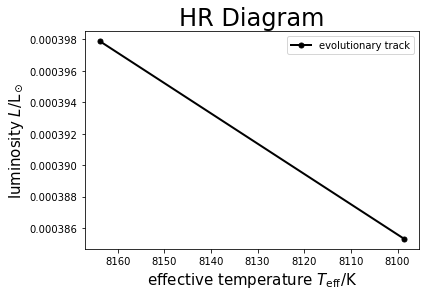

In [21]:
plt.plot(10**hist['log_Teff'][1:], 
         10**hist['log_L'][1:], 
         lw=2, c='k', marker='o', label='evolutionary track')

plt.gca().invert_xaxis()
plt.xlabel(r'effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [22]:
index = get_index(logs_dir)
index

,model_number,priority,profile_number
0,1,2,1
1,50,1,2
2,66,3,3
3,67,3,4
4,68,2,5
5,100,1,6
6,150,1,7
7,200,1,8
8,250,1,9
9,300,1,10


In [23]:
prof = load_profile(3,logs_dir)
prof

,zone,mass,logR,logT,logRho,logP,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,dm,...,mg25,mg26,fe56,log_D_mix,log_D_mix_non_rotation,log_D_conv,tau,omega,j_rot,extra_heat
0,1,8.000000e-01,-1.013250,4.293628,-7.514615,4.873915,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.666667e-01,0.0,0.0,0.0
1,2,8.000000e-01,-1.013341,4.379724,-7.237434,5.245923,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,3.473428e+00,0.0,0.0,0.0
2,3,8.000000e-01,-1.013389,4.430111,-7.091889,5.443381,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,6.569571e+00,0.0,0.0,0.0
3,4,8.000000e-01,-1.013424,4.466241,-6.993274,5.578659,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,9.879839e+00,0.0,0.0,0.0
4,5,8.000000e-01,-1.013452,4.494679,-6.918981,5.681679,0.700000,0.280000,0.020000,2.485512e+19,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,1.339212e+01,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,1.000058e-06,-3.472715,7.729079,4.567305,20.664903,0.699532,0.280457,0.020011,9.942630e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.913013e+13,0.0,0.0,0.0
877,878,5.000293e-07,-3.573063,7.729084,4.567326,20.664934,0.699532,0.280457,0.020011,4.971315e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.918229e+13,0.0,0.0,0.0
878,879,2.500147e-07,-3.673409,7.729087,4.567339,20.664954,0.699532,0.280457,0.020011,2.485657e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.922368e+13,0.0,0.0,0.0
879,880,1.250074e-07,-3.773755,7.729089,4.567348,20.664966,0.699532,0.280457,0.020011,1.242829e+26,...,0.000069,0.000079,1.000000e-99,-99.0,-99.0,-99.0,2.925654e+13,0.0,0.0,0.0


In [24]:
# element_value_list = [prof.h1.values, prof.he3.values, prof.he4.values, prof.c12.values, 
#                 prof.n14.values, prof.o16.values, prof.o18.values, prof.ne20.values, 
#                 prof.ne22.values, prof.mg24.values]

# element_list = ['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24']

element_value_list = [prof.neut.values,prof.h1.values,prof.h2.values,prof.he3.values,
                prof.he4.values,prof.li7.values,prof.be7.values,
                prof.be9.values,prof.be10.values,prof.b8.values,prof.b11.values,
                prof.c11.values,prof.c12.values,prof.c13.values,prof.c14.values,
               prof.n13.values,prof.n14.values,prof.n15.values,prof.o14.values,
                prof.o15.values,prof.o16.values,prof.o17.values,
                prof.o18.values,prof.f17.values,prof.f18.values,prof.f19.values,
                prof.ne18.values,prof.ne19.values,prof.ne20.values,prof.ne21.values,
               prof.ne22.values,prof.na21.values,prof.na22.values,prof.na23.values,
                prof.na24.values,prof.mg23.values,prof.mg24.values,
                prof.mg25.values,prof.mg26.values,prof.fe56.values]

element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

elements_dict = dict(zip(element_list, element_value_list))

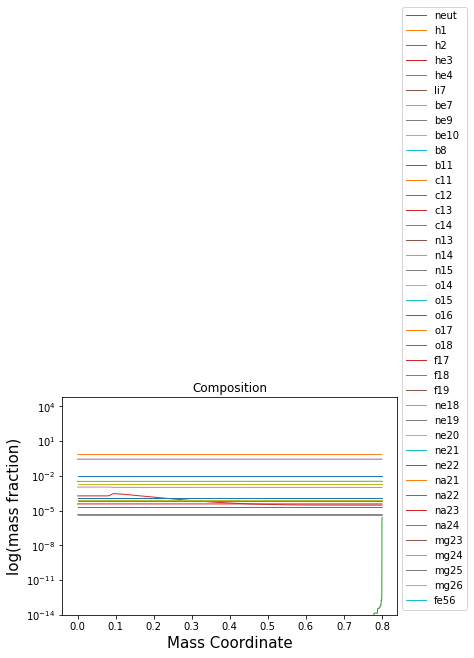

In [25]:
plot_composition(prof,elements_dict)

In [26]:

def create_abund_file(prof,elements_dict,he_progenitor_massfracs):
    logxq = prof.logxq.values
    xq = 10**logxq
    masscoord = prof.mass.values
    print(len(xq))
    print(len(elements_dict.keys()))
    
    output_file = open('/Users/ccra8514/Desktop/abund.dat','w')
    output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')
    
    for i in range(0,len(xq)):
        if masscoord[i] > 0.5:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                write_str = write_str+'\t'+f'{he_progenitor_massfracs[element]:e}'#':.7f}'
            print(write_str)
            output_file.write(write_str+'\n')
        else:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                if element in ['c12','o16']:
                    write_str = write_str+'\t'+str(0.5)
                else:
                    write_str = write_str+'\t'+str(0.0)
            print(write_str)
            output_file.write(write_str+'\n')
#             print('interior')
            
    output_file.close()

In [27]:
create_abund_file(prof,elements_dict,massfracs_dict)

881
40
1.0000000000000327e-99	1.545868e-88	2.159389e-03	2.278104e-19	1.323623e-05	9.878064e-01	3.167314e-21	1.971475e-25	3.730663e-34	9.835199e-46	2.463895e-58	5.503187e-30	1.129541e-99	4.152421e-05	1.154095e-05	7.682553e-68	3.075515e-57	6.323751e-03	3.152400e-07	5.492505e-99	3.176034e-60	2.545630e-04	8.843587e-06	1.370809e-09	7.859124e-66	2.996101e-99	3.578454e-10	1.144274e-99	5.676810e-99	9.575027e-04	7.204855e-06	4.730377e-11	1.101710e-99	1.231324e-99	1.020736e-04	1.396873e-99	1.168586e-99	3.082167e-04	4.065892e-05	4.651620e-05	1.621530e-03
1.562499999995966e-14	1.545868e-88	2.159389e-03	2.278104e-19	1.323623e-05	9.878064e-01	3.167314e-21	1.971475e-25	3.730663e-34	9.835199e-46	2.463895e-58	5.503187e-30	1.129541e-99	4.152421e-05	1.154095e-05	7.682553e-68	3.075515e-57	6.323751e-03	3.152400e-07	5.492505e-99	3.176034e-60	2.545630e-04	8.843587e-06	1.370809e-09	7.859124e-66	2.996101e-99	3.578454e-10	1.144274e-99	5.676810e-99	9.575027e-04	7.204855e-06	4.730377e-11	1.101710e-99	1.231324e-99

In [28]:

def create_abund_file_mimic(prof,elements_dict,he_progenitor_massfracs):
    logxq = prof.logxq.values
    xq = 10**logxq
    masscoord = prof.mass.values
    print(len(xq))
    print(len(elements_dict.keys()))
    
    output_file = open('/Users/ccra8514/Desktop/munson_co_abund.dat','w')
    output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')
    
    for i in range(0,len(xq)):
        if masscoord[i] > 0.55:
            write_str = str(xq[i])
            for element in elements_dict.keys():
                write_str = write_str+'\t'+f'{he_progenitor_massfracs[element]:e}'#':.7f}'
#             for i in range(0,len(exterior_abunds)):
#                 write_str = write_str+'\t'+f'{exterior_abunds[i]:e}'#':.7f}'
            print(write_str)
            output_file.write(write_str+'\n')
        else:
            write_str = str(xq[i])
            for i in range(0,len(interior_abunds)):
                write_str = write_str+'\t'+f'{interior_abunds[i]:e}'#':.7f}'
#             for element in elements_dict.keys():
#                 if element in ['c12','o16']:
#                     write_str = write_str+'\t'+str(0.5)
#                 else:
#                     write_str = write_str+'\t'+str(0.0)
            print(write_str)
            output_file.write(write_str+'\n')
#             print('interior')
            
    output_file.close()

In [29]:
create_abund_file_mimic(prof,elements_dict,massfracs_dict)

881
40
1.0000000000000327e-99	1.545868e-88	2.159389e-03	2.278104e-19	1.323623e-05	9.878064e-01	3.167314e-21	1.971475e-25	3.730663e-34	9.835199e-46	2.463895e-58	5.503187e-30	1.129541e-99	4.152421e-05	1.154095e-05	7.682553e-68	3.075515e-57	6.323751e-03	3.152400e-07	5.492505e-99	3.176034e-60	2.545630e-04	8.843587e-06	1.370809e-09	7.859124e-66	2.996101e-99	3.578454e-10	1.144274e-99	5.676810e-99	9.575027e-04	7.204855e-06	4.730377e-11	1.101710e-99	1.231324e-99	1.020736e-04	1.396873e-99	1.168586e-99	3.082167e-04	4.065892e-05	4.651620e-05	1.621530e-03
1.562499999995966e-14	1.545868e-88	2.159389e-03	2.278104e-19	1.323623e-05	9.878064e-01	3.167314e-21	1.971475e-25	3.730663e-34	9.835199e-46	2.463895e-58	5.503187e-30	1.129541e-99	4.152421e-05	1.154095e-05	7.682553e-68	3.075515e-57	6.323751e-03	3.152400e-07	5.492505e-99	3.176034e-60	2.545630e-04	8.843587e-06	1.370809e-09	7.859124e-66	2.996101e-99	3.578454e-10	1.144274e-99	5.676810e-99	9.575027e-04	7.204855e-06	4.730377e-11	1.101710e-99	1.231324e-99

NameError: name 'interior_abunds' is not defined

( ((exp(s%lnS(k_core))-highentropy)/(m_core-m_shell))*(s%m(k)-m_core)+lowentropy - exp(s%lnS(k)) ) * s%T(k)/trel

In [30]:
munson_abund = pd.read_csv('../mesaruns/engineering/RCB_eng_testing/munson_abund.dat',skiprows=1,sep='\s+',
                           names=['xq','neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56'])
munson_abund

,xq,neut,h1,h2,he3,he4,li7,be7,be9,be10,...,ne22,na21,na22,na23,na24,mg23,mg24,mg25,mg26,fe56
0,1.000000e-99,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
1,1.001001e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
2,2.002002e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
3,3.003003e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
4,4.004004e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.959960e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
996,9.969970e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
997,9.979980e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
998,9.989990e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325


In [31]:
exterior_abunds = munson_abund.loc[0,munson_abund.columns != 'xq'].values
interior_abunds = munson_abund.loc[999,munson_abund.columns != 'xq'].values

In [32]:
exterior_abunds

array([6.04000445e-16, 4.14000483e-05, 5.44539676e-16, 3.21106529e-08,
       9.92907268e-01, 1.74825840e-17, 1.97569466e-16, 1.04056429e-15,
       1.23870954e-23, 4.97785038e-24, 6.97327407e-15, 4.71954331e-12,
       2.84982538e-04, 1.93791849e-03, 9.27893638e-05, 1.87073230e-07,
       2.37136874e-03, 1.62536061e-07, 2.06327411e-11, 3.22793270e-07,
       2.01218642e-03, 1.73487508e-05, 7.17485446e-10, 3.67575859e-09,
       1.78368035e-09, 1.66843095e-09, 6.52439101e-17, 7.15940749e-15,
       9.48362369e-05, 6.08440740e-06, 1.25450846e-05, 1.24272682e-12,
       2.68482288e-11, 1.05343209e-05, 8.97767586e-08, 5.71634699e-15,
       3.23268394e-05, 4.38092221e-06, 5.10350573e-06, 1.68191003e-04])

In [33]:
interior_abunds

array([2.80175154e-62, 2.02647051e-44, 9.21399514e-30, 1.91538971e-25,
       1.15482244e-14, 5.95204759e-29, 5.73949708e-56, 2.67221631e-42,
       1.73349903e-34, 1.11283850e-99, 5.89844216e-26, 1.46511561e-99,
       3.68319974e-01, 1.48406931e-07, 1.71701503e-12, 6.60209680e-48,
       5.71351372e-10, 3.44179885e-14, 6.01753275e-96, 3.95710902e-63,
       6.28947403e-01, 9.13198616e-07, 7.97104338e-11, 4.70207572e-52,
       6.88049981e-57, 3.42752152e-07, 4.45268985e-99, 5.41758610e-99,
       2.75336652e-04, 2.18999818e-05, 1.92051746e-03, 1.83905656e-99,
       1.62741625e-99, 3.82727162e-05, 2.35406229e-99, 4.93124885e-99,
       6.37061936e-05, 3.01261100e-05, 5.64968655e-05, 3.24861552e-04])

In [37]:
new_abund = pd.read_csv('../mesaruns/engineering/RCB_eng_testing/my_abund.dat',skiprows=1,sep='\s+',
                           names=['xq','neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56'])
new_abund

,xq,neut,h1,h2,he3,he4,li7,be7,be9,be10,...,ne22,na21,na22,na23,na24,mg23,mg24,mg25,mg26,fe56
0,1.000000e-99,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
1,1.562500e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
2,3.125000e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
3,4.687500e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
4,6.250000e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,9.999987e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
877,9.999994e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
878,9.999997e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
879,9.999998e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325


In [38]:
mimic_abund = pd.read_csv('../mesaruns/engineering/RCB_eng_testing/new_munson_abund.dat',skiprows=1,sep='\s+',
                           names=['xq','neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56'])
mimic_abund

,xq,neut,h1,h2,he3,he4,li7,be7,be9,be10,...,ne22,na21,na22,na23,na24,mg23,mg24,mg25,mg26,fe56
0,1.000000e-99,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
1,1.562500e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
2,3.125000e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
3,4.687500e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
4,6.250000e-14,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,9.999987e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
877,9.999994e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
878,9.999997e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
879,9.999998e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325


In [39]:
new_brad_abund = pd.read_csv('../mesaruns/engineering/RCB_eng_testing/abund_single_zone_subZ_newrun2.dat',skiprows=1,sep='\s+',
                           names=['xq','neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56'])
new_brad_abund

,xq,neut,h1,h2,he3,he4,li7,be7,be9,be10,...,ne22,na21,na22,na23,na24,mg23,mg24,mg25,mg26,fe56
0,1.000000e-99,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
1,1.001001e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
2,2.002002e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
3,3.003003e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
4,4.004004e-03,6.040004e-16,4.140005e-05,5.445397e-16,3.211065e-08,9.929073e-01,1.748258e-17,1.975695e-16,1.040564e-15,1.238710e-23,...,0.000013,1.242727e-12,2.684823e-11,0.000011,8.977676e-08,5.716347e-15,0.000032,0.000004,0.000005,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.959960e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
996,9.969970e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
997,9.979980e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325
998,9.989990e-01,2.801752e-62,2.026471e-44,9.213995e-30,1.915390e-25,1.154822e-14,5.952048e-29,5.739497e-56,2.672216e-42,1.733499e-34,...,0.001921,1.839057e-99,1.627416e-99,0.000038,2.354062e-99,4.931249e-99,0.000064,0.000030,0.000056,0.000325


In [42]:
# log xq = log(1 − q) with q = m(r)/M.

def convert_xq_to_mass(xq):
    logxq = np.log10(xq)
    q = 1 - np.asarray(xq)
    mass_coord = q*0.8
    return mass_coord

In [47]:
def convert_mass_to_xq(masscoord,total_mass):
    masscoord = np.asarray(masscoord)
    q = masscoord/total_mass
    xq = 1 - q
    return xq

In [48]:
# prof.mass

In [49]:
mass_ratio = (0.8-0.53)/0.53
mass_ratio

0.5094339622641509

In [50]:
convert_mass_to_xq(0.53,0.8)

0.3375

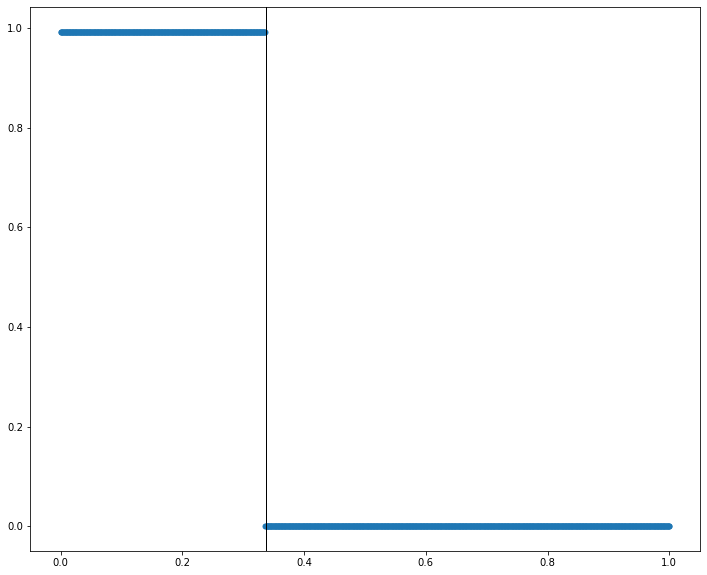

In [52]:
plt.figure(figsize=(12,10))
plt.scatter(munson_abund['xq'],munson_abund['he4'],label='brad')
plt.axvline(0.3375,color='k')
plt.show()

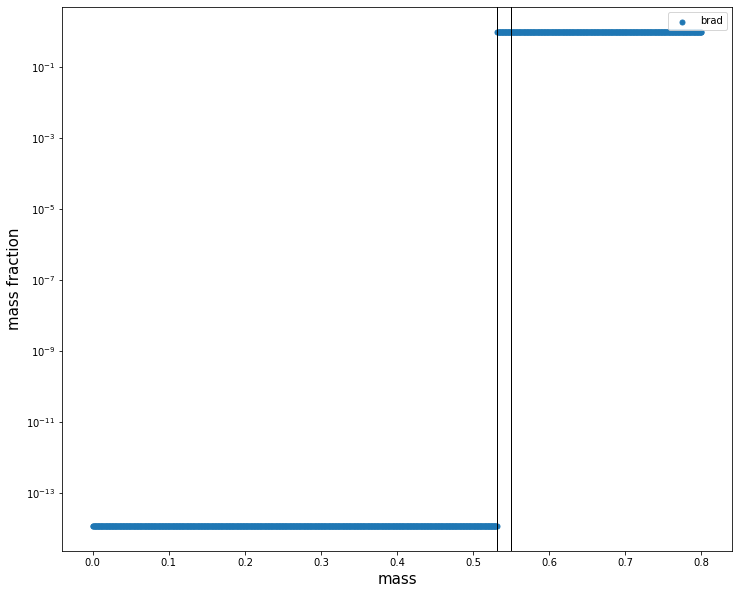

In [53]:
plt.figure(figsize=(12,10))
plt.scatter(convert_xq_to_mass(munson_abund['xq']),munson_abund['he4'],label='brad')
# plt.scatter(convert_xq_to_mass(new_brad_abund['xq']),new_brad_abund['he4'],label='new brad')
# plt.scatter(convert_xq_to_mass(new_abund['xq']),new_abund['he4'],label='new')
# plt.scatter(convert_xq_to_mass(mimic_abund['xq']),mimic_abund['he4'],label='mimic')
# plt.xlabel('xq')
plt.axvline(0.55,color='k')
plt.axvline(0.531,color='k')
# plt.xlim(0.5,0.6)
plt.yscale('log')
plt.legend()
plt.xlabel('mass')
plt.ylabel('mass fraction')
plt.show()

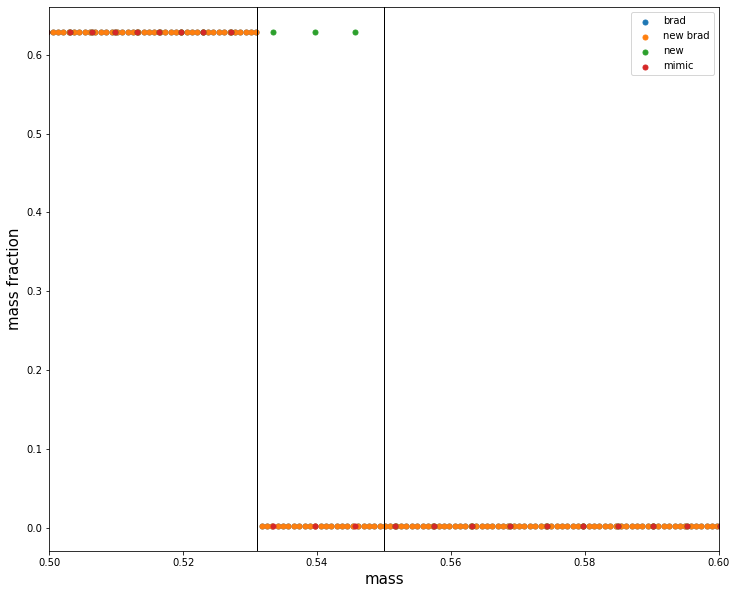

In [52]:
plt.figure(figsize=(12,10))
plt.scatter(convert_xq_to_mass(munson_abund['xq']),munson_abund['o16'],label='brad')
plt.scatter(convert_xq_to_mass(new_brad_abund['xq']),new_brad_abund['o16'],label='new brad')
plt.scatter(convert_xq_to_mass(new_abund['xq']),new_abund['o16'],label='new')
plt.scatter(convert_xq_to_mass(mimic_abund['xq']),mimic_abund['o16'],label='mimic')
# plt.xlabel('xq')
plt.axvline(0.55,color='k')
plt.axvline(0.531,color='k')
plt.xlim(0.5,0.6)
# plt.yscale('log')
plt.legend()
plt.xlabel('mass')
plt.ylabel('mass fraction')
plt.show()

In [4]:
import numpy as np
import pandas as pd

element_list = ['neut','h1','h2','he3','he4','li7','be7','be9','be10','b8','b11','c11','c12','c13','c14',
               'n13','n14','n15','o14','o15','o16','o17','o18','f17','f18','f19','ne18','ne19','ne20','ne21',
               'ne22','na21','na22','na23','na24','mg23','mg24','mg25','mg26','fe56']

hewd_abunds = np.array([6.04000445e-16, 4.14000483e-05, 5.44539676e-16, 3.21106529e-08,
                        9.92907268e-01, 1.74825840e-17, 1.97569466e-16, 1.04056429e-15,
                        1.23870954e-23, 4.97785038e-24, 6.97327407e-15, 4.71954331e-12,
                        2.84982538e-04, 1.93791849e-03, 9.27893638e-05, 1.87073230e-07,
                        2.37136874e-03, 1.62536061e-07, 2.06327411e-11, 3.22793270e-07,
                        2.01218642e-03, 1.73487508e-05, 7.17485446e-10, 3.67575859e-09,
                        1.78368035e-09, 1.66843095e-09, 6.52439101e-17, 7.15940749e-15,
                        9.48362369e-05, 6.08440740e-06, 1.25450846e-05, 1.24272682e-12,
                        2.68482288e-11, 1.05343209e-05, 8.97767586e-08, 5.71634699e-15,
                        3.23268394e-05, 4.38092221e-06, 5.10350573e-06, 1.68191003e-04])

cowd_abunds = np.array([2.80175154e-62, 2.02647051e-44, 9.21399514e-30, 1.91538971e-25,
                        1.15482244e-14, 5.95204759e-29, 5.73949708e-56, 2.67221631e-42,
                        1.73349903e-34, 1.11283850e-99, 5.89844216e-26, 1.46511561e-99,
                        3.68319974e-01, 1.48406931e-07, 1.71701503e-12, 6.60209680e-48,
                        5.71351372e-10, 3.44179885e-14, 6.01753275e-96, 3.95710902e-63,
                        6.28947403e-01, 9.13198616e-07, 7.97104338e-11, 4.70207572e-52,
                        6.88049981e-57, 3.42752152e-07, 4.45268985e-99, 5.41758610e-99,
                        2.75336652e-04, 2.18999818e-05, 1.92051746e-03, 1.83905656e-99,
                        1.62741625e-99, 3.82727162e-05, 2.35406229e-99, 4.93124885e-99,
                        6.37061936e-05, 3.01261100e-05, 5.64968655e-05, 3.24861552e-04])

def convert_mass_to_xq(masscoord,total_mass):
    masscoord = np.asarray(masscoord)
    q = masscoord/total_mass
    xq = 1 - q
    return xq

xq_arr = np.linspace(0,1,1000)

total_mass = 0.8
core_mass = 0.53
# mass_ratio = M_secondary/M_primary
# mass_ratio = env_mass/core_mass
# mass_ratio = (total_mass-core_mass)/core_mass
# core_mass = np.round(total_mass/(1+mass_ratio),3)

def create_abund_file(xq,element_list,interior_abunds,exterior_abunds,total_mass,core_mass):
    output_file = open('/Users/ccra8514/Desktop/abund.dat','w')
    output_file.write(str(len(xq))+'\t'+str(len(element_list))+'\n')

    xq_bound = convert_mass_to_xq(core_mass,total_mass)
    interior_dict = dict(zip(element_list, interior_abunds))
    exterior_dict = dict(zip(element_list, exterior_abunds))
    
    for i in range(0,len(xq)):
        if xq[i] > xq_bound:
            write_str = f'{xq[i]:e}'
            for element in element_list:
                write_str = write_str+'\t'+f'{exterior_dict[element]:e}'#':.7f}'
#             print(write_str)
            output_file.write(write_str+'\n')
        else:
            write_str = f'{xq[i]:e}'
            for element in element_list:
                write_str = write_str+'\t'+f'{interior_dict[element]:e}'#':.7f}'
#             print(write_str)
            output_file.write(write_str+'\n')
            
    output_file.close()

create_abund_file(xq_arr,element_list,cowd_abunds,hewd_abunds,total_mass,core_mass)

